<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/NN_calssify_different_clothing_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# import the mnist dataset
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [22]:
# Create the label in to small list of human readable
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
y_train[0]

np.uint8(9)

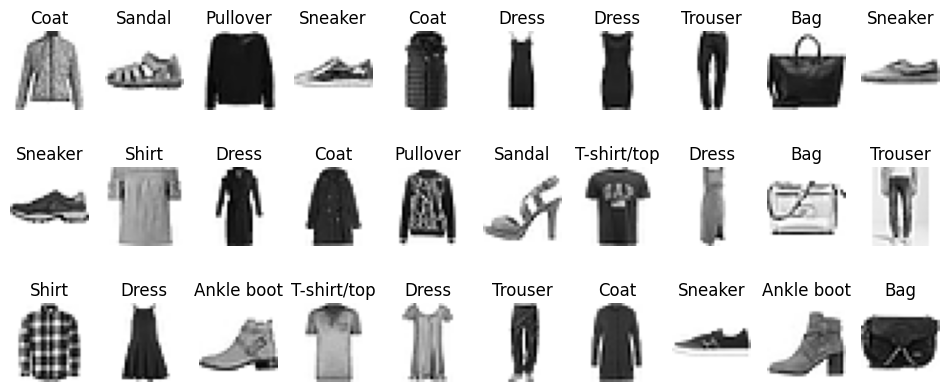

In [37]:
# Plot a random trainig dataset
import random
plt.figure(figsize=(12, 5))
for i in range(30):
  plt.subplot(3, 10, i+1)
  class_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[class_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[class_index]])
  plt.axis(False)

In [45]:
# Create a model to indentify the clothing images
# 1. create a model
m1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # this will tell the model that we are passing an image of 28x28 dimention
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu, name="Input_layer"),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu, name="Hidden_layer_1"),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu, name="Hidden_layer_2"),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax, name="Output_layer"),
], name="Model_1")
# 2. Compile the model
m1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy,
           metrics=['accuracy'])
# 3. fit the model
h1 = m1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7119 - loss: 4.5022 - val_accuracy: 0.7713 - val_loss: 0.6659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8170 - loss: 0.5209 - val_accuracy: 0.8314 - val_loss: 0.4861
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8392 - loss: 0.4462 - val_accuracy: 0.8188 - val_loss: 0.4790
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8511 - loss: 0.4093 - val_accuracy: 0.8445 - val_loss: 0.4456
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8629 - loss: 0.3848 - val_accuracy: 0.8383 - val_loss: 0.4336
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8685 - loss: 0.3690 - val_accuracy: 0.8536 - val_loss: 0.4202
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8763 - loss: 0.3518 - val_accuracy: 0.8554 - val_loss: 0.4048
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8796 - loss: 0

In [46]:
# 4. Evaluate the model
m1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.3742


[0.37600815296173096, 0.8634999990463257]

<Axes: >

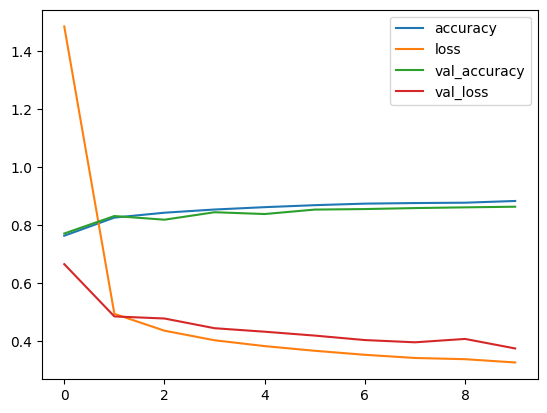

In [48]:
# 5. Check the loss curve
pd.DataFrame(h1.history).plot()

## Not really good let's try it with scaled(Normalized) data

# Neural Network prefer data to be scale(normalize), this means they like to have the numbers in tensor to find pattern between 0 & 1.

In [54]:
# Get the min and max of training dataset
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [57]:
# Let's preprocess(normalize) the x_train and x_test
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0
x_train_norm.min(), x_train_norm.max()

(np.float64(0.0), np.float64(1.0))

In [59]:
m1.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Input_layer (Dense)             │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,232 (2.74 MB)

 Trainable params: 239,410 (935.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 478,822 (1.83 MB)

In [60]:
m1.input_shape

(None, 28, 28)

In [63]:
# Let's create a model with scaled dataset and same as m1
# 1. create a model using sequential api
m2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax),
])
# 2. Compile the model
m2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy,
           metrics=['accuracy'])
# 3. Fit the model on the normalized dataset
h2 = m2.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7821 - loss: 0.6118 - val_accuracy: 0.8363 - val_loss: 0.4530
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8684 - loss: 0.3641 - val_accuracy: 0.8573 - val_loss: 0.4010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8792 - loss: 0.3266 - val_accuracy: 0.8631 - val_loss: 0.3839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8868 - loss: 0.3020 - val_accuracy: 0.8771 - val_loss: 0.3415
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8975 - loss: 0.2765 - val_accuracy: 0.8723 - val_loss: 0.3413
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9006 - loss: 0.2620 - val_accuracy: 0.8765 - val_loss: 0.3320
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9016 - loss: 0.2535 - val_accuracy: 0.8886 - val_loss: 0.3205
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9081 - loss: 0

In [64]:
# 4. Evaluate the model m2 vs m1
m2.evaluate(x_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8877 - loss: 0.3264


[0.3264352083206177, 0.8873000144958496]

In [65]:
m1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.3742


[0.37600815296173096, 0.8634999990463257]

<Axes: >

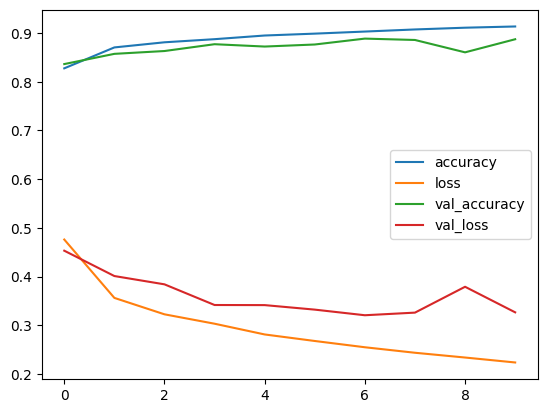

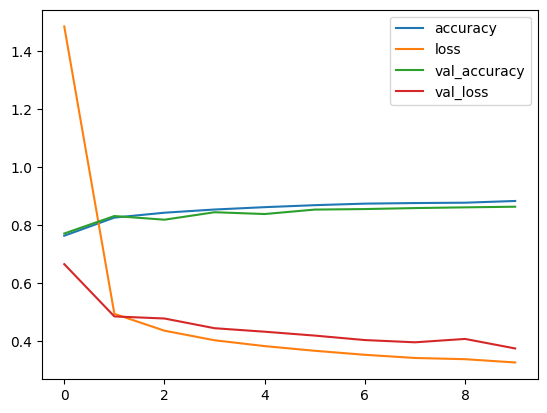

In [67]:
# 5. Plot the loss curve of m2 vs m1
pd.DataFrame(h2.history).plot()
pd.DataFrame(h1.history).plot()